<hr style="margin-bottom: 50px;">
<center>
    <h1 style="margin-top: 0; margin-bottom: 0;">
        <b><u>Exploration et analyse des données</u></b>
    </h1>
</center>
<hr style="margin-top: 50px;">


In [57]:
import config, src
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [58]:
raw_data = src.load_data(config.RAW_DATA_FILE)
processed_data = src.load_data(config.PROCESSED_DATA)

Données chargées avec succès.
Données chargées avec succès.


---

# __Visualisation générale__

---

In [59]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [60]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   key               50000 non-null  int64  
 7   liveness          50000 non-null  float64
 8   loudness          50000 non-null  float64
 9   mode              50000 non-null  int64  
 10  speechiness       50000 non-null  float64
 11  tempo             50000 non-null  float64
 12  valence           50000 non-null  float64
 13  music_genre       50000 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 5.3 MB


In [61]:
raw_data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [62]:
processed_data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,270703.43126,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.889,0.759,5
1,31.0,0.01270,0.622,218293.00000,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.002,0.531,5
2,28.0,0.00306,0.620,215613.00000,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.994,0.333,5
3,34.0,0.02540,0.774,166875.00000,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.014,0.270,5
4,32.0,0.00465,0.638,222369.00000,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.036,0.323,5


In [63]:
continious_variables = processed_data.select_dtypes(include='float64').columns
processed_data[continious_variables].describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.220420,0.306383,0.558241,2.455189e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,119.960388,0.456264
std,15.542008,0.341340,0.178632,1.061562e+05,0.264559,0.325409,0.161637,6.162990,0.101373,29.150294,0.247119
min,0.000000,0.000000,0.059600,1.550900e+04,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,34.000000,0.020000,0.442000,1.948750e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,96.775750,0.257000
50%,45.000000,0.144000,0.568000,2.307057e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,120.494000,0.448000
75%,56.000000,0.552000,0.687000,2.714400e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,139.468250,0.648000
max,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


---

# __Exploration__

---

Dans le cadre de ce projet, la variable cible est `music_genre`.  

Lors du nettoyage des données, nous avons d'abord écarté les variables `instance_id` et `obtained_date`, car elles ne fournissent aucune information pertinentes sur les données.  
Nous avons ensuite supprimé les variables `artist_name` et `track_name`, car elles ne sont pas utiles pour nos modèles de prédiction. Néanmoins, ces deux variables restent tout de même intéressantes à explorer.

In [64]:
tracks_unknown_artist = raw_data[raw_data['artist_name'] == 'empty_field']
print(f"Il y a {tracks_unknown_artist.shape[0]} titres où le nom de l'artiste n'est pas spécifié.")

Il y a 2489 titres où le nom de l'artiste n'est pas spécifié.


In [65]:
duplicates = raw_data[raw_data.duplicated(subset=['artist_name', 'track_name'], keep=False)]
duplicates = duplicates.sort_values(by=['artist_name', 'track_name'])
n_duplicates = raw_data.duplicated(subset=['artist_name', 'track_name']).sum()

print(f'Il y a {n_duplicates} titres présents plusieurs fois dans les données.')

src.save_data(duplicates, 'duplicated_data', 'raw')

Il y a 3839 titres présents plusieurs fois dans les données.
Données sauvegardées avec succès.


In [66]:
artist_count = raw_data.loc[raw_data['artist_name'] != 'empty_field', 'artist_name'].unique().size
track_count = raw_data['track_name'].unique().size

print(f"Nombre d'artistes dans les données : {artist_count}")
print(f"Nombre de titres différents : {track_count}")
print(f"Nombre de données différentes : {raw_data.shape[0] - n_duplicates}")

Nombre d'artistes dans les données : 6863
Nombre de titres différents : 41700
Nombre de données différentes : 46166


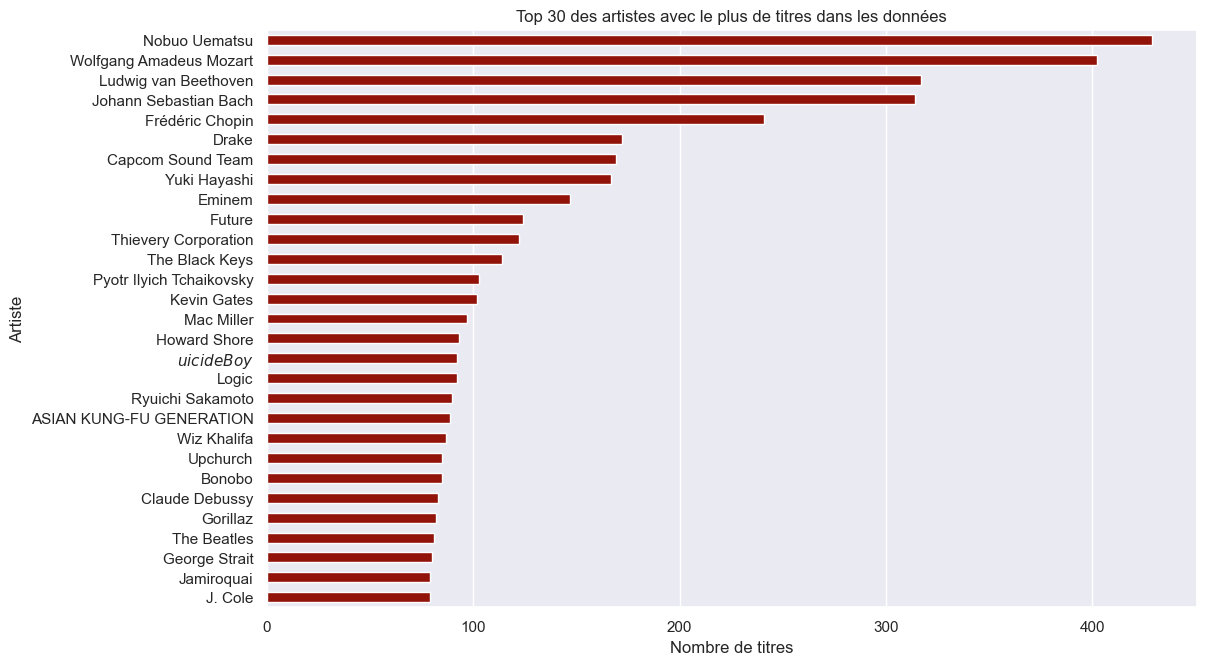

In [67]:
n_artists = 30

most_present_artists = raw_data['artist_name'].value_counts().head(n_artists)
most_present_artists.drop('empty_field', inplace=True)

most_present_artists.plot(kind='barh', color='#91130a', figsize=(12, n_artists/4))
plt.xlabel('Nombre de titres')
plt.ylabel('Artiste')
plt.title(f'Top {n_artists} des artistes avec le plus de titres dans les données')
plt.gca().invert_yaxis()
plt.grid(axis='y')
plt.show()

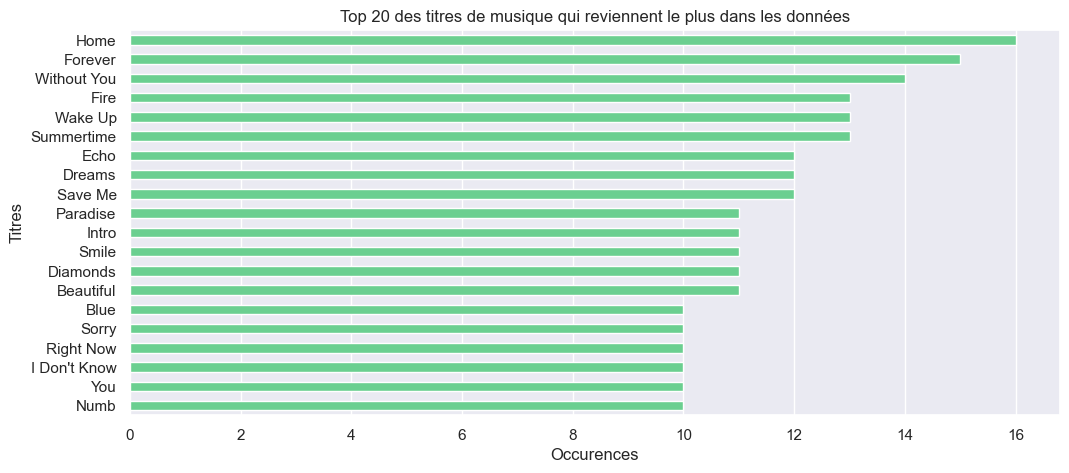

In [68]:
n_tracks = 20

most_present_track_name = raw_data['track_name'].value_counts().head(n_tracks)

most_present_track_name.plot(kind='barh', color='#6bcf90', figsize=(12, n_tracks/4))
plt.xlabel('Occurences')
plt.ylabel('Titres')
plt.title(f'Top {n_tracks} des titres de musique qui reviennent le plus dans les données')
plt.gca().invert_yaxis()
plt.grid(axis='y')
plt.show()

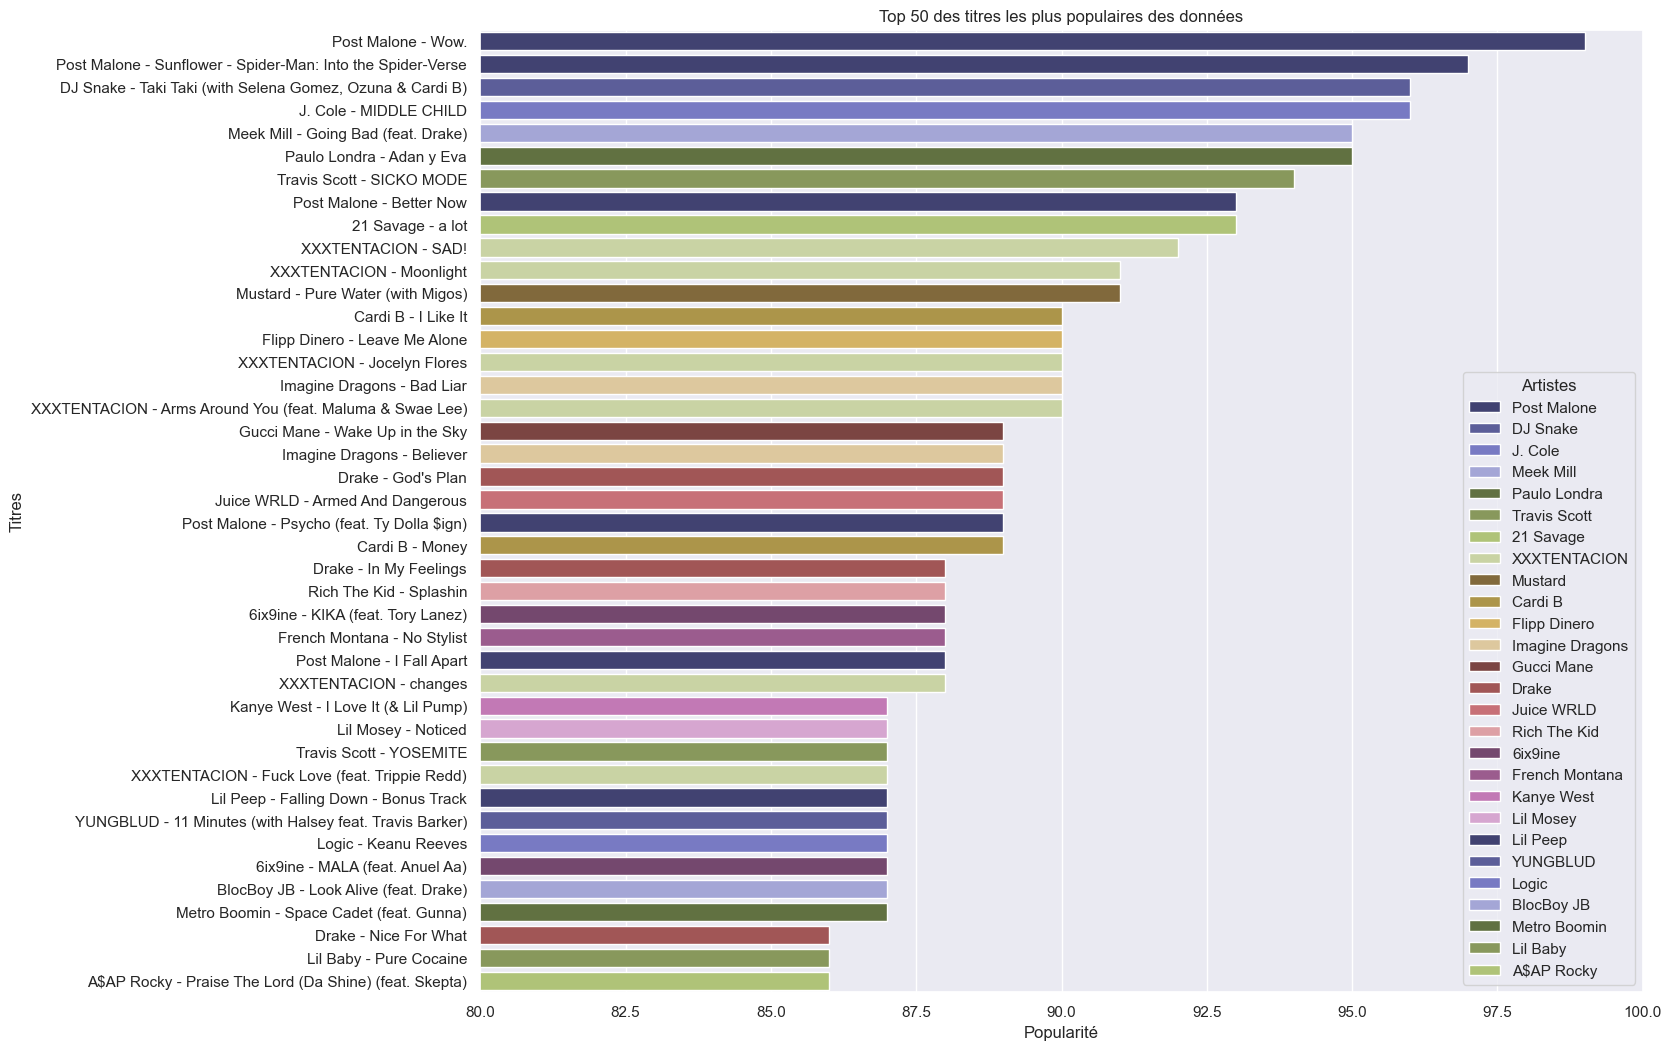

In [69]:
n_tracks = 50

most_popular_tracks = raw_data.sort_values(by='popularity', ascending=False)[['artist_name', 'track_name', 'popularity']].head(n_tracks)
most_popular_tracks = most_popular_tracks[most_popular_tracks['artist_name'] != 'empty_field']
most_popular_tracks['artist_track'] = most_popular_tracks['artist_name'] + ' - ' + most_popular_tracks['track_name']

plt.figure(figsize=(15, n_tracks/4))
sns.barplot(data=most_popular_tracks, x='popularity', y='artist_track', hue='artist_name', palette='tab20b')
plt.xlabel('Popularité')
plt.xlim(80, 100)
plt.ylabel('Titres')
plt.legend(title='Artistes')
plt.title(f'Top {n_tracks} des titres les plus populaires des données')
plt.show()

In [70]:
def formate_duration(duration):
    total_sec = duration / 1000
    min = int(total_sec // 60)
    sec = round(total_sec % 60)
    return f'{min}:{sec:02d}'

mean_duration = formate_duration(processed_data['duration_ms'].mean())
longest_duration = formate_duration(processed_data['duration_ms'].max())
shortest_duration = formate_duration(processed_data['duration_ms'].min())

print(f"La durée moyenne d'un titre dans les données est de {mean_duration}.")
print(f"La durée la plus longue d'un titre dans les données est de {longest_duration}.")
print(f"La durée la plus courte d'un titre dans les données est de {shortest_duration}.")

La durée moyenne d'un titre dans les données est de 4:06.
La durée la plus longue d'un titre dans les données est de 80:31.
La durée la plus courte d'un titre dans les données est de 0:16.


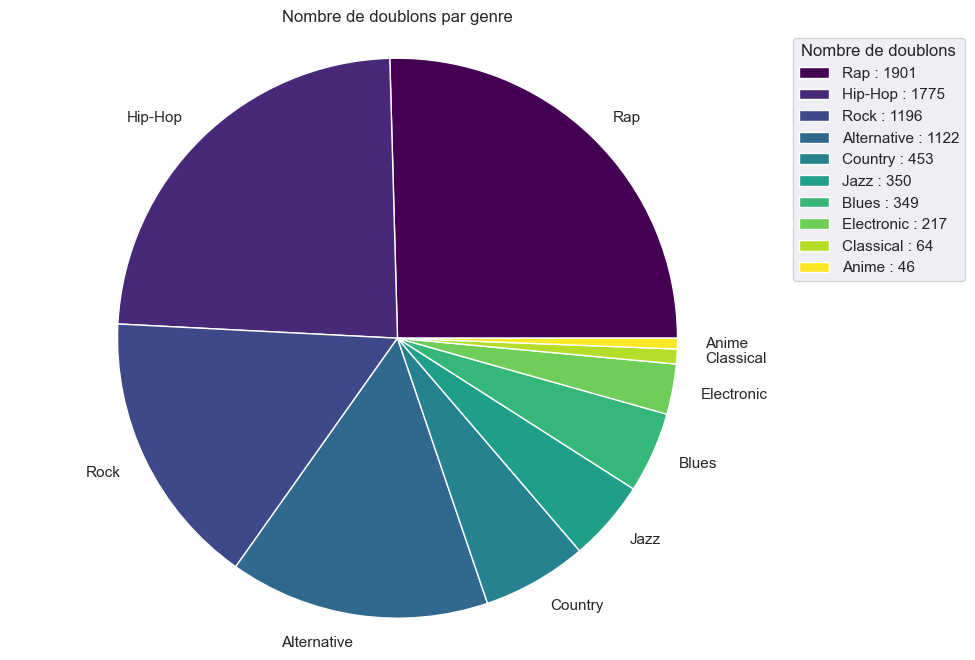

In [71]:
duplicates_repartition = duplicates['music_genre'].value_counts()
values = duplicates_repartition.values
labels = duplicates_repartition.index.to_numpy()

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(values)))

plt.figure(figsize=(10, 8))
wedges, _ = plt.pie(values, labels=labels, colors=colors)
plt.legend(wedges, [f'{label} : {value}' for label, value in zip(labels, values)], title='Nombre de doublons', bbox_to_anchor=(1, 1, 0, 0))
plt.title('Nombre de doublons par genre')
plt.axis('equal')
plt.show()

---  
# __Analyse statistique__

---

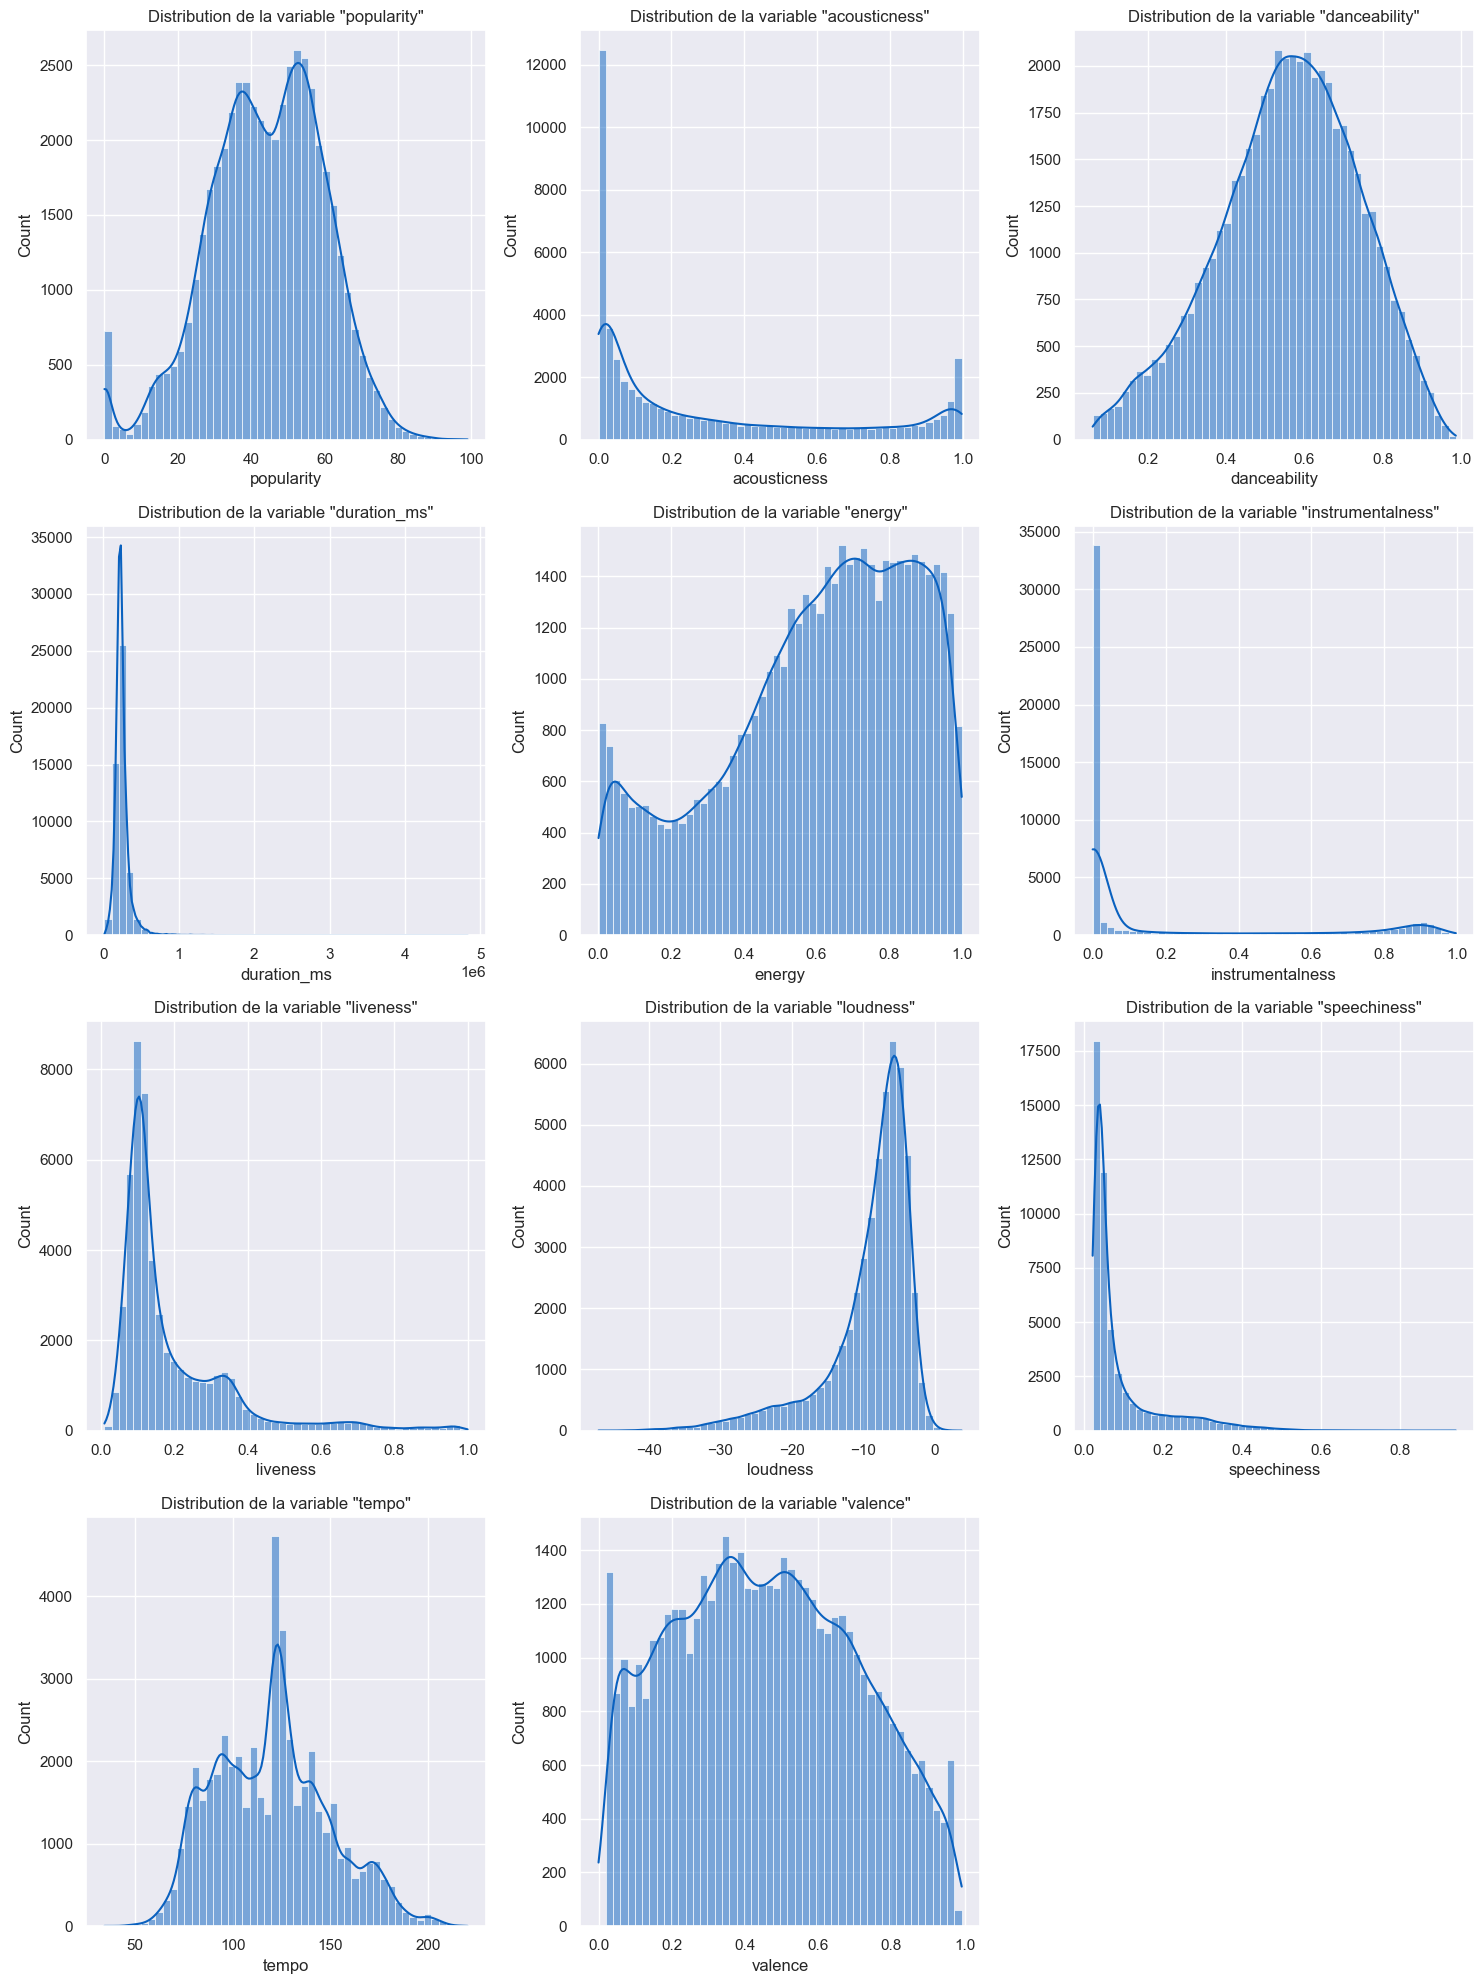

In [72]:
ncols = 3
nrows = (len(continious_variables) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))
axes = axes.flatten()

for i, variable in enumerate(continious_variables):
    sns.histplot(processed_data[variable], bins=50, kde=True, color='#0a61bf', ax=axes[i])
    axes[i].set_title(f'Distribution de la variable "{variable}"')

for j in range(len(continious_variables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

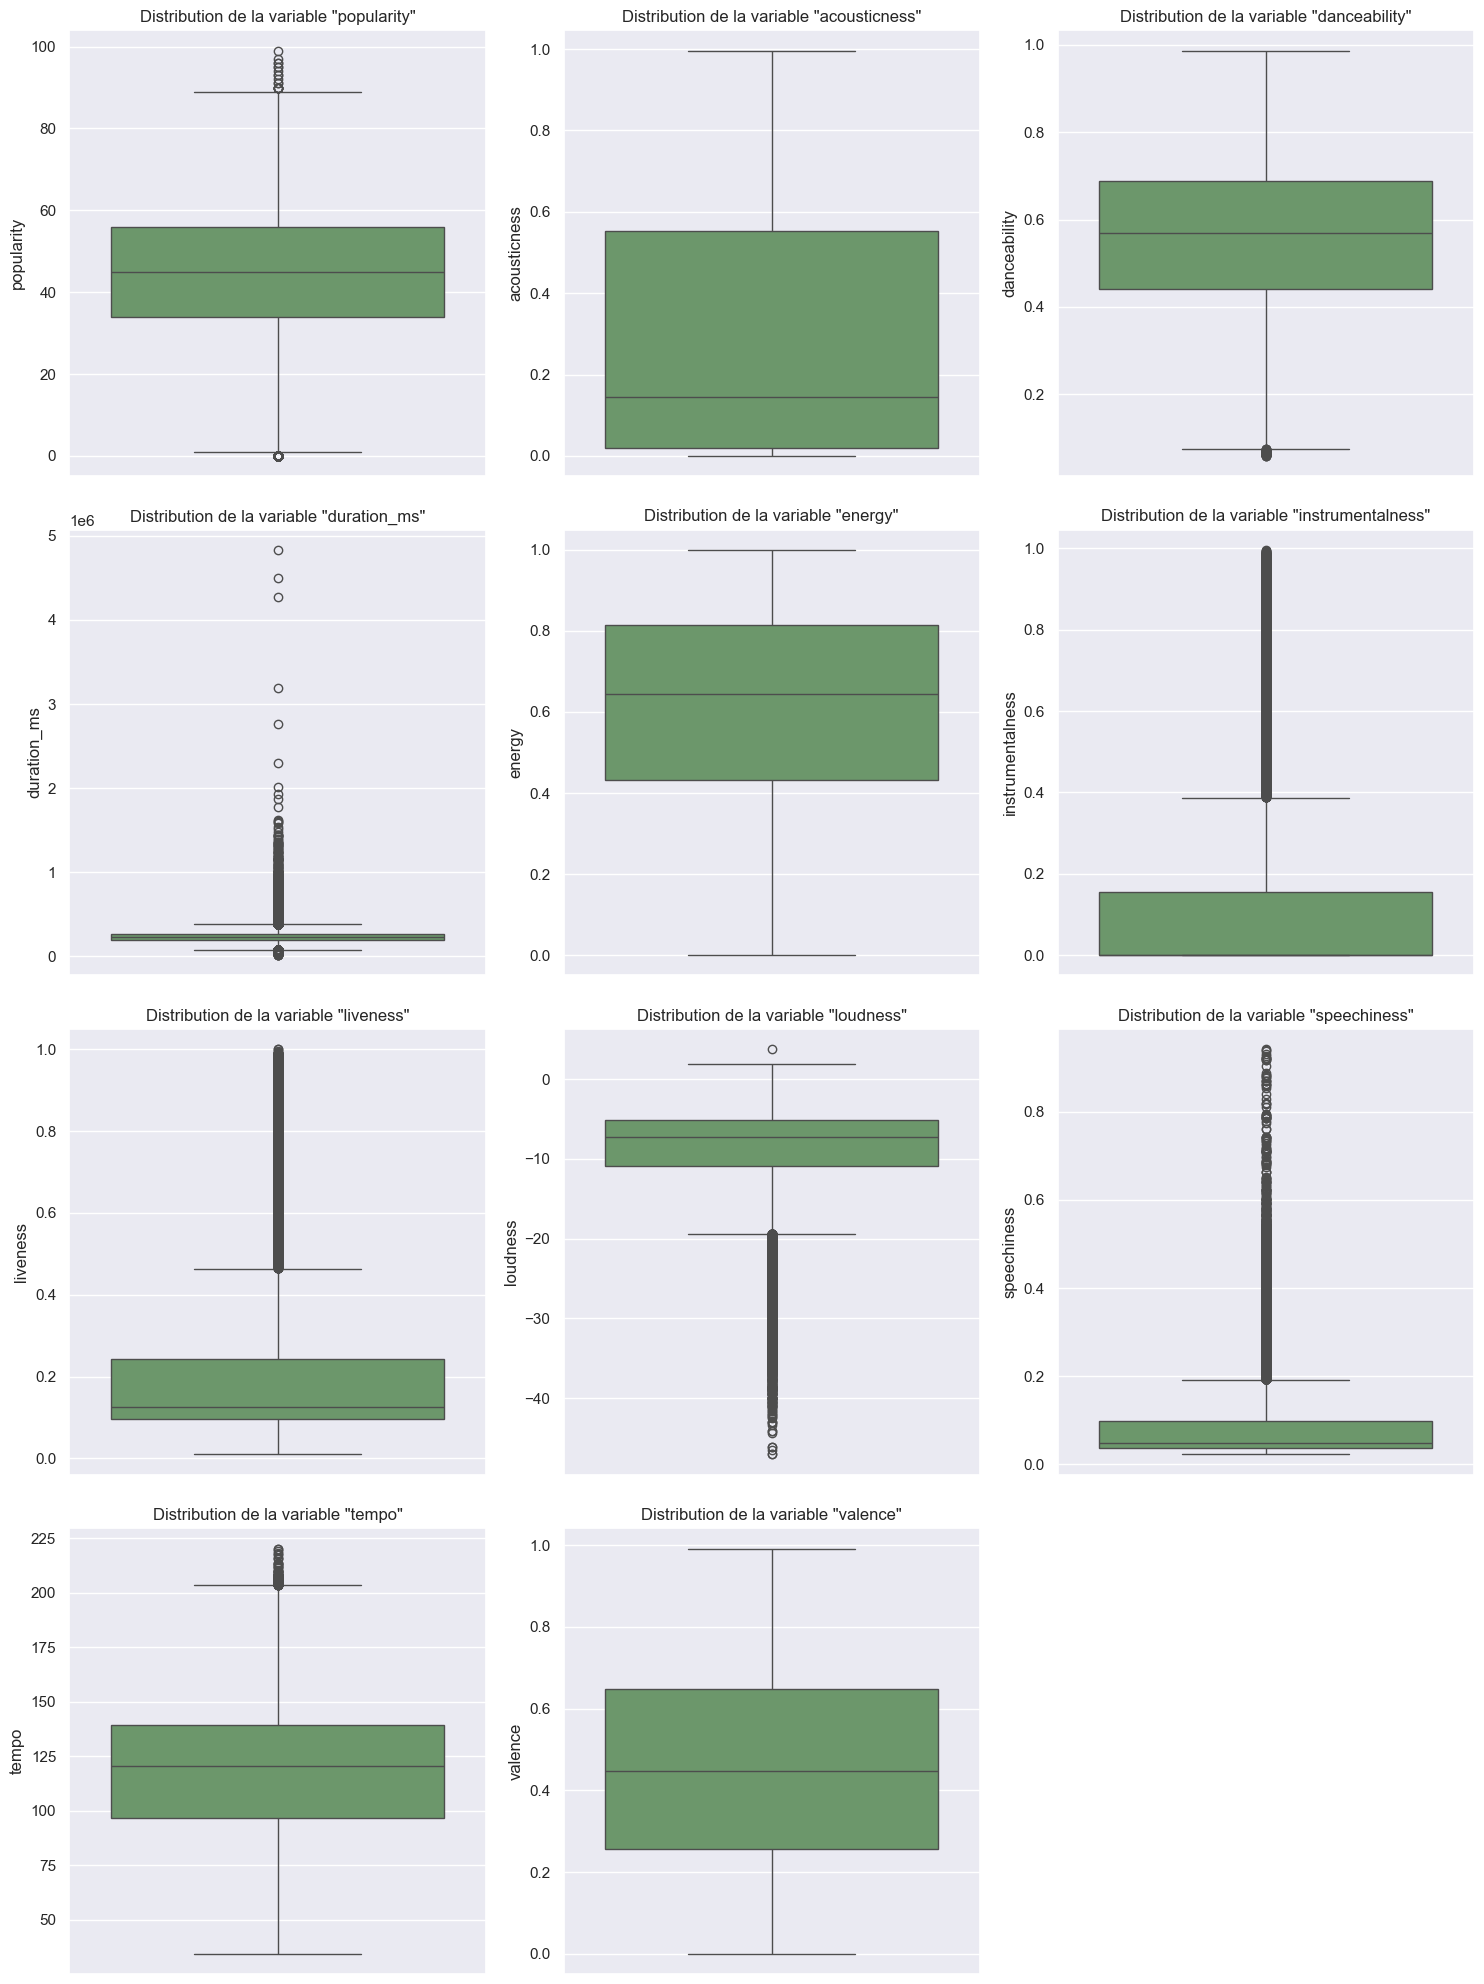

In [73]:
ncols = 3
nrows = (len(continious_variables) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))
axes = axes.flatten()

for i, variable in enumerate(continious_variables):
    sns.boxplot(processed_data, y=variable, color='#659e64', ax=axes[i])
    axes[i].set_title(f'Distribution de la variable "{variable}"')
    plt.xticks(rotation=90)

for j in range(len(continious_variables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

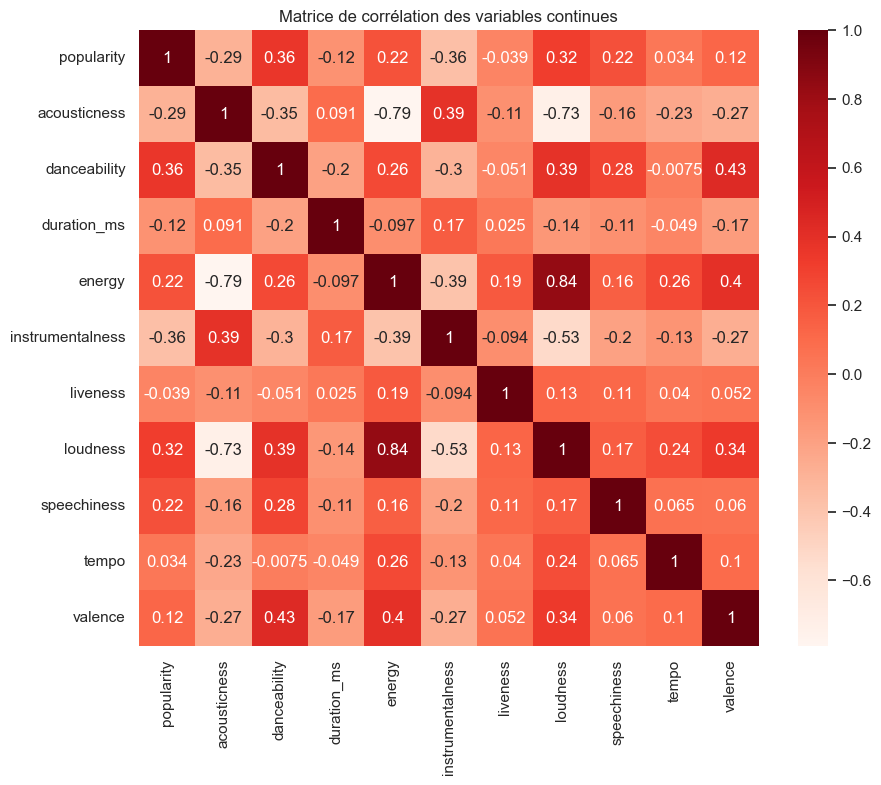

In [75]:
corr = processed_data[continious_variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='Reds', annot=True)
plt.title('Matrice de corrélation des variables continues')
plt.show()

---